In [6]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/data/tim/heronWorkspace/src")

import numpy as np
import sys
import os
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

The data stems from 23 camera traps located in streams in Canton Zurich in Switzerland and contains a total of 415406 images with size hxw = (2448, 3264). All the pictures are taken with the same camera type from january 20217 to july 2017.
Generally, every camera takes an image every 15 minutes, day and night. In the day, the images contain three channels (RGB), in the night it is an infrared taking the shots??. Additionally, the cameras contain a motion sensor that allows them to take pictures if motion in front of the camera is detected.

In [5]:
DATA_DIR = "/data/shared/herons/TinaDubach_data"
files = os.listdir(DATA_DIR)
folders = [f for f in files if os.path.isdir(DATA_DIR+'/'+f)]
print(f'Folder Len: {len(folders)}')
countImgs = 0
for folder in folders:
    imgs = os.listdir(DATA_DIR+'/'+folder)
    countImgs += len(imgs)
print(f'Image Count: {countImgs}')

Folder Len: 23
Image Count: 415406


The following are some samples:

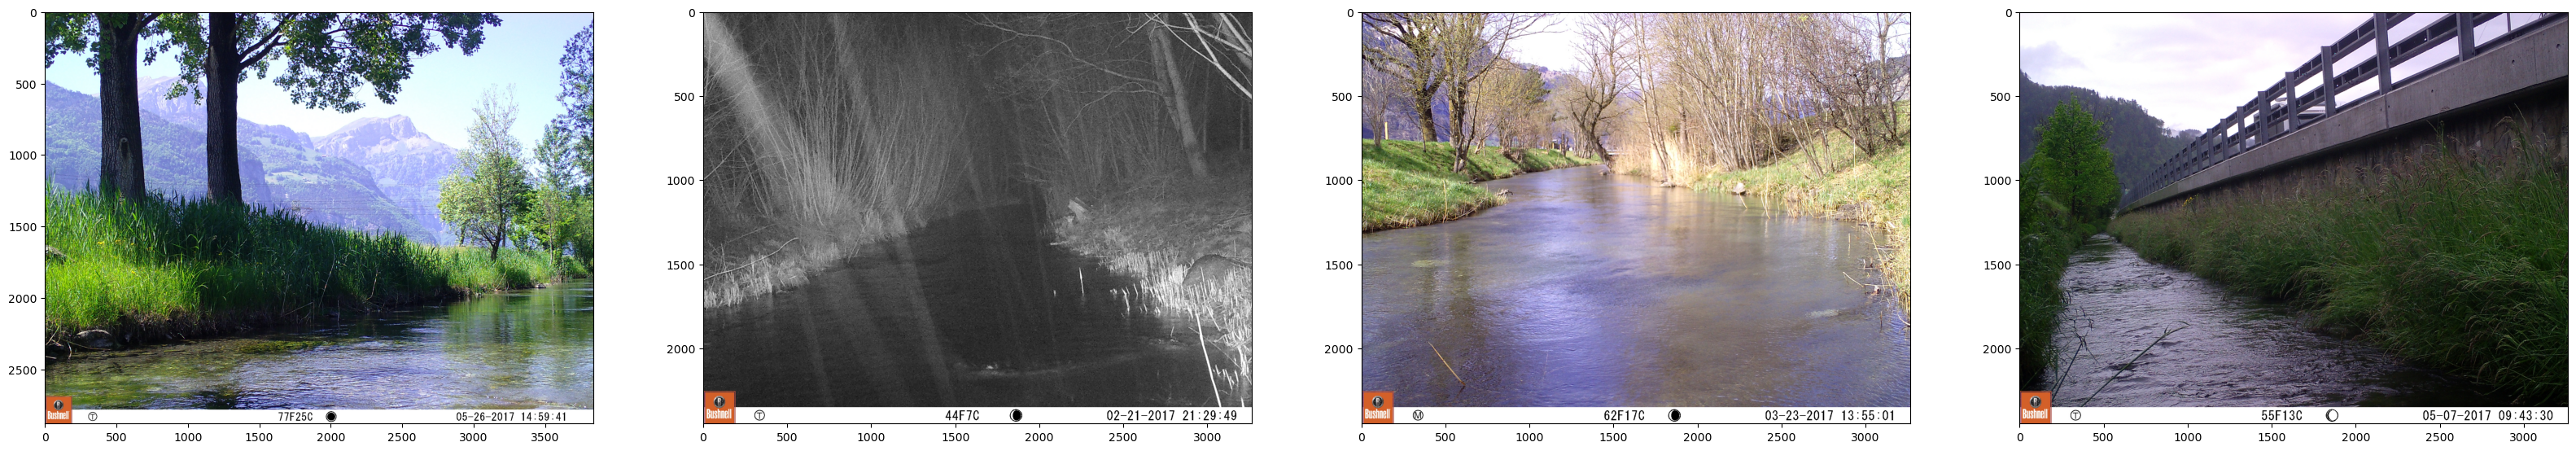

In [14]:
f, a = plt.subplots(1,4, figsize=(40,10))
a[0].imshow(plt.imread(DATA_DIR+'/'+folders[0]+'/'+ (os.listdir(DATA_DIR+'/'+folders[0])[0])))
a[1].imshow(plt.imread(DATA_DIR+'/'+folders[1]+'/'+ (os.listdir(DATA_DIR+'/'+folders[1])[30])))
a[2].imshow(plt.imread(DATA_DIR+'/'+folders[2]+'/'+ (os.listdir(DATA_DIR+'/'+folders[2])[0])))
a[3].imshow(plt.imread(DATA_DIR+'/'+folders[3]+'/'+ (os.listdir(DATA_DIR+'/'+folders[3])[0])))

### What is an anomaly and how do we define it
Before we're able to classify our data into anomalous and normal frames we have to set a definition of what an anomaly is. Of course, it's everything that doesn't occur othen or in terms of our camera traps: Anything that isn't caught by the cameras lense ofthen! This, already, isnt' as easy as first thought. Should it be everything that doesn't belong to the normal scenery? Does a car count as an anomaly? What if the camera's loacated at a street and there is a car every minute? What if there is a car every week? (such as in SBU4?) What if the camera is located at popular walking path where people walk only on sunday?
In the end, a definition of what an anomaly is is very dependent on the camera with its location and the surrounding.

## Basic Image Classification
The images can easily be classified into rgb and grayscale (infrared) images:

In [ ]:
stdSum = batch.std(dim=1).sum(dim=1)
isGrayscale = stdSum < 0.1

In the bottom of the images there is an M for pictures taken from the motion sensor and a T for the pictures taken every 15 minutes. 
To classify the data into these two classes, the M/T in the bottom part can be cut out to count it's amount of black pixels. If this amount is greater than 3690 pixel, it is an M, otherwise a T.

In [ ]:
 def decideM(self, imgBatch: torch.Tensor):
        cond = imgBatch < 0.5
        return cond.sum(dim=(1, 2, 3)).gt(3690)

## Challenges
The data is very divers in terms of time in the day, time in the year, location, weather, vegetation, ... which introduces many challenges for training a performant autoencoder.
### Between cameras
The data varies a lot between cameras which makes it difficult to train one global model with all the data.
#### Nr of herons
#### Cars
#### People
#### Motion Sensor
Initially, we expect a motion sensor to trigger if there is an anomaly happening. There are many cases for which it is different. There are a lot of motion triggered images that don't contain any anomaly. Some examples are: (include visuals)
- Water (reflection?) (evtl search for paper)
- Other moving objects - include picture of orange cable
But there are also many images that weren't triggered by the motion sensor but still contain motion. Considering that the motion sensor is our only capability to sort out anomalies in the training set for our autoencoder, these images containing anomalies but aren't captured with motion sensor are a problem. In case many of them are in the training set, the autoencoder learns these anomalies which is bad. 

### Within cameras

## Interval of the samples
At least every 15 minutes, a picture is taken from the camera trap. This leads to data that lies somewhere between a normal video and an independent samples. The entire scenery can change in 15 minutes which makes it really hard to exploit the time between the pictures such as for example study ... did. 
For example, a sunrise can completely change the scenery...
Or fog can come up and completely change the scenery...

Table ... gives an insight about how many frames contain consecutive samples of herons.


In [ ]:
f, a = plt.subplots(1,2, figsize=(20,10))
a[0].

### Difference between consecutive frames
Nevertheless we can still exploit the, hopefully, similar properties of consecutive images with...

## Grayscale data
Because in the night we do even have less data than in the day in terms of colored data, I expect the task to be even harder with grayscale data. To make it easier, from now on the grayscale data is excluded (excepting Chapter ...)

## Data Tina Dubach
Fortunately, I didn't have to classify the data by myself. Someone did already classify most of the data into pictures containing a bird and pictures containing no bird. The pictures containing birds were even classified further into thos containing herons and those containing other species of birds.

### Validation
To investigate to which extent I can use the classification , I wrote a little script such that I can manually validate it. (See Appendix A)
I introduced five classes: 
- Pictures containing no anomaly (Class 0)
- Pictures containing a heron that should be easy to see (Class 1)
- Pictures containing a heron that is hard to see (Class 2)
- Pictures containing an anomaly that is easy to see (Class 3) *
- Pictures containing an anomaly that is hard to see (Class 4) *
\* except herons



## Training and test set for the AE